In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [18]:

# MNIST 데이터셋을 읽고 신경망에 입력할 혀앹로 전환
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
# LeNet-5 신경망 모델 설계
cnn = Sequential()

In [21]:
cnn.add(Conv2D(6, (5, 5), padding = 'same', activation = 'relu', input_shape = (28, 28 ,1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(16, (5, 5), padding = 'same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(120, (5, 5), padding = 'same', activation = 'relu'))
cnn.add(Flatten())
cnn.add(Dense(84, activation = 'relu'))
cnn.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

Epoch 1/30
469/469 - 10s - 21ms/step - accuracy: 0.9403 - loss: 0.1943 - val_accuracy: 0.9791 - val_loss: 0.0661
Epoch 2/30
469/469 - 2s - 5ms/step - accuracy: 0.9839 - loss: 0.0517 - val_accuracy: 0.9883 - val_loss: 0.0394
Epoch 3/30
469/469 - 2s - 5ms/step - accuracy: 0.9885 - loss: 0.0363 - val_accuracy: 0.9900 - val_loss: 0.0326
Epoch 4/30
469/469 - 3s - 6ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9907 - val_loss: 0.0276
Epoch 5/30
469/469 - 2s - 4ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9894 - val_loss: 0.0305
Epoch 6/30
469/469 - 2s - 4ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9886 - val_loss: 0.0353
Epoch 7/30
469/469 - 2s - 4ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9910 - val_loss: 0.0304
Epoch 8/30
469/469 - 3s - 6ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9889 - val_loss: 0.0334
Epoch 9/30
469/469 - 2s - 5ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9904 - val_loss: 0.0312

In [7]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose = 0)
print("정확률은", res[1]*100)

정확률은 98.989999294281


In [8]:
import matplotlib.pyplot as plt

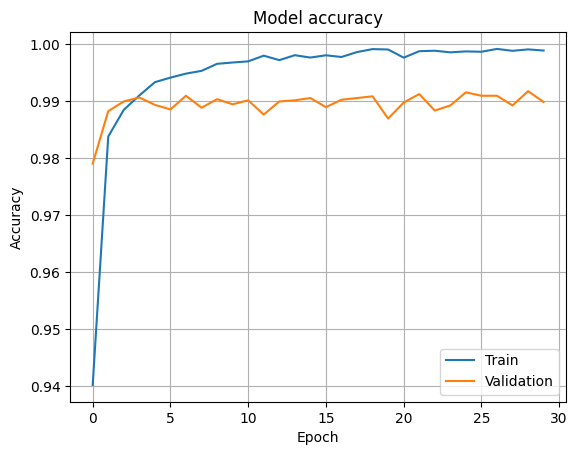

In [10]:
# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

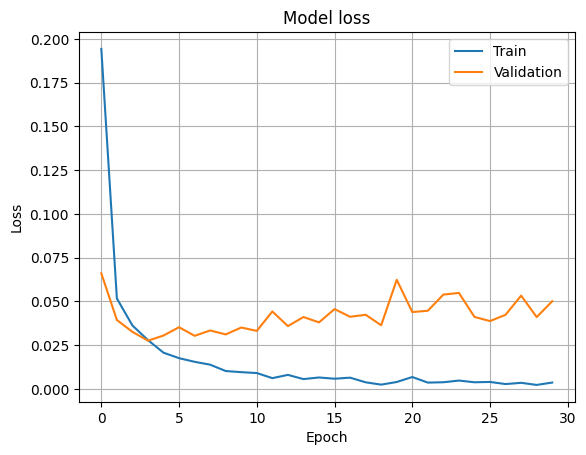

In [12]:
# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [14]:
# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_triain, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [23]:
# 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28 ,1)))
cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

Epoch 1/12
469/469 - 10s - 22ms/step - accuracy: 0.9240 - loss: 0.2502 - val_accuracy: 0.9811 - val_loss: 0.0547
Epoch 2/12
469/469 - 4s - 9ms/step - accuracy: 0.9735 - loss: 0.0891 - val_accuracy: 0.9867 - val_loss: 0.0378
Epoch 3/12
469/469 - 5s - 11ms/step - accuracy: 0.9801 - loss: 0.0665 - val_accuracy: 0.9883 - val_loss: 0.0345
Epoch 4/12
469/469 - 5s - 11ms/step - accuracy: 0.9837 - loss: 0.0551 - val_accuracy: 0.9902 - val_loss: 0.0284
Epoch 5/12
469/469 - 3s - 6ms/step - accuracy: 0.9859 - loss: 0.0456 - val_accuracy: 0.9901 - val_loss: 0.0320
Epoch 6/12
469/469 - 5s - 11ms/step - accuracy: 0.9868 - loss: 0.0413 - val_accuracy: 0.9897 - val_loss: 0.0310
Epoch 7/12
469/469 - 5s - 11ms/step - accuracy: 0.9882 - loss: 0.0349 - val_accuracy: 0.9891 - val_loss: 0.0321
Epoch 8/12
469/469 - 3s - 6ms/step - accuracy: 0.9895 - loss: 0.0327 - val_accuracy: 0.9898 - val_loss: 0.0315
Epoch 9/12
469/469 - 3s - 7ms/step - accuracy: 0.9907 - loss: 0.0284 - val_accuracy: 0.9908 - val_loss: 0.

In [25]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose = 0)
print("정확률은", res[1]*100)

정확률은 99.21000003814697


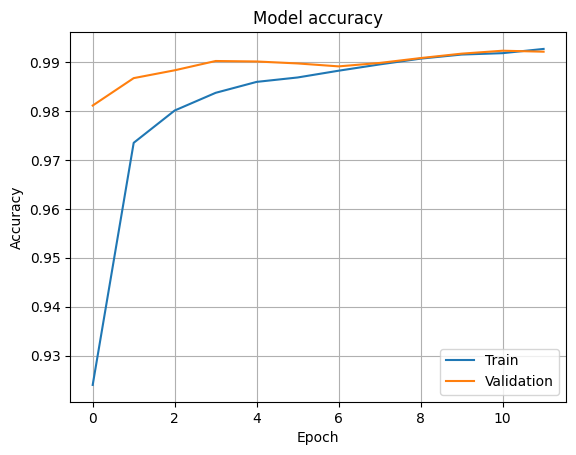

In [26]:
# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

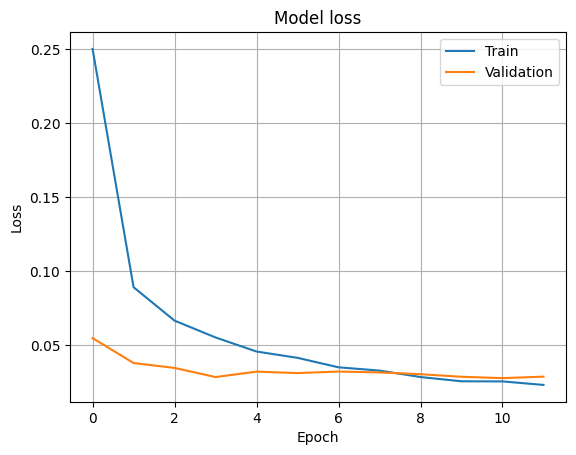

In [27]:
# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(Conv2D(32, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = 'softmax'))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

Epoch 1/30
391/391 - 15s - 38ms/step - accuracy: 0.3943 - loss: 1.6422 - val_accuracy: 0.5345 - val_loss: 1.2831
Epoch 2/30
391/391 - 11s - 28ms/step - accuracy: 0.5579 - loss: 1.2363 - val_accuracy: 0.6115 - val_loss: 1.0903
Epoch 3/30
391/391 - 3s - 9ms/step - accuracy: 0.6190 - loss: 1.0772 - val_accuracy: 0.6710 - val_loss: 0.9408
Epoch 4/30
391/391 - 4s - 10ms/step - accuracy: 0.6557 - loss: 0.9723 - val_accuracy: 0.7043 - val_loss: 0.8564
Epoch 5/30
391/391 - 5s - 12ms/step - accuracy: 0.6876 - loss: 0.8901 - val_accuracy: 0.7233 - val_loss: 0.8037
Epoch 6/30
391/391 - 3s - 8ms/step - accuracy: 0.7084 - loss: 0.8277 - val_accuracy: 0.7187 - val_loss: 0.8141
Epoch 7/30
391/391 - 5s - 14ms/step - accuracy: 0.7259 - loss: 0.7827 - val_accuracy: 0.7403 - val_loss: 0.7439
Epoch 8/30
391/391 - 5s - 13ms/step - accuracy: 0.7419 - loss: 0.7316 - val_accuracy: 0.7573 - val_loss: 0.7115
Epoch 9/30
391/391 - 6s - 14ms/step - accuracy: 0.7544 - loss: 0.7014 - val_accuracy: 0.7649 - val_loss:

In [31]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test, y_test, verbose = 0)
print("정확률은", res[1]*100)

정확률은 79.50000166893005


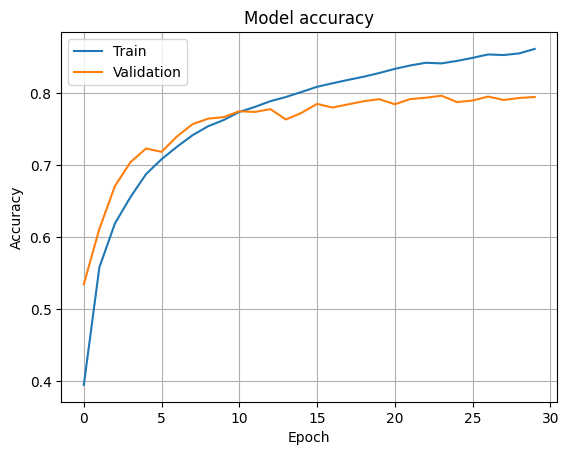

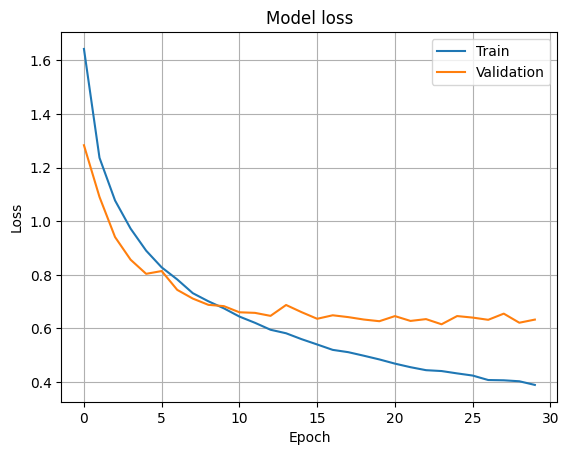

In [32]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()